In [182]:

import numpy as np
import random

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from keras.datasets import mnist



# PART 1

In [183]:
def pca(X):
    mean = np.mean(X, axis=0)

    X_centered = X - mean

    U, s, Vt = np.linalg.svd(X_centered)

    # Compute the principal components and eigenvalues
    eigenvectors = Vt.T
    eigenvalues = s**2 / (X.shape[0] - 1)

    return mean, eigenvalues, eigenvectors


# PART 2

I used PCA on the entire mnist dataset in this section. Principle Components are obtained, and RandomForestClassifier uses KFold Validation.

In [184]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

print('Train Shape:',x_train.shape)
print('Class Shape:',y_train.shape)

Train Shape: (60000, 784)
Class Shape: (60000,)


In [185]:

randomOrder = np.arange(x_train.shape[0])
np.random.shuffle(randomOrder)

X_TrainSet = x_train[randomOrder[:1000]]
Y_TrainSet = y_train[randomOrder[:1000]]

print('Train Set Shape:',X_TrainSet.shape)
print('Train Class Shape:',Y_TrainSet.shape)

mean_vector, eig_vals, pc_vectors = pca(X_TrainSet)

print("Mean Vector: ", mean_vector)
print("Eigen Values: ", eig_vals)
print("Principal Components: ", pc_vectors)


Train Set Shape: (1000, 784)
Train Class Shape: (1000,)
Mean Vector:  [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 5.20000e-02 1.93000e-01 9.20000e-02 2.77000e-01
 4.81000e-01 2.76000e-01 6.82000e-01 3.28000e-01 5.90000e-02 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 3.16000e-01
 8.15000e-01 1.30100e+00 1.89900e+00 2.18500e+00 2.52800e+00 2.54700e+00
 2.52100e+00 3.31500e+00 3.26500e+00 2.05800e+00 9.230

/tmp/ipykernel_7818/1963585583.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


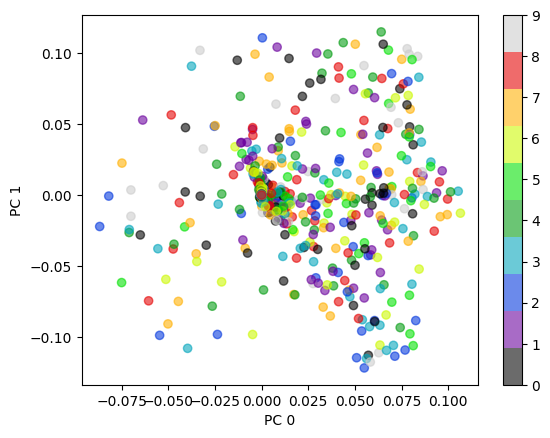

In [186]:


plt.scatter(pc_vectors[:, 0],pc_vectors[:, 1],
            c=Y_TrainSet[:784], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.colorbar()



/tmp/ipykernel_7818/4140976015.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


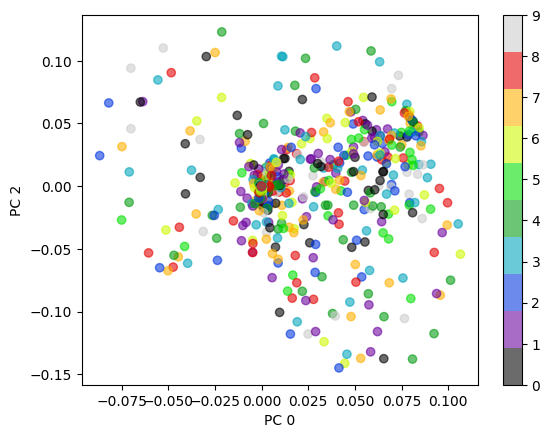

In [187]:


plt.scatter(pc_vectors[:, 0],pc_vectors[:, 2],
            c=Y_TrainSet[:784], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC 0')
plt.ylabel('PC 2')
plt.colorbar()



/tmp/ipykernel_7818/3026723062.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


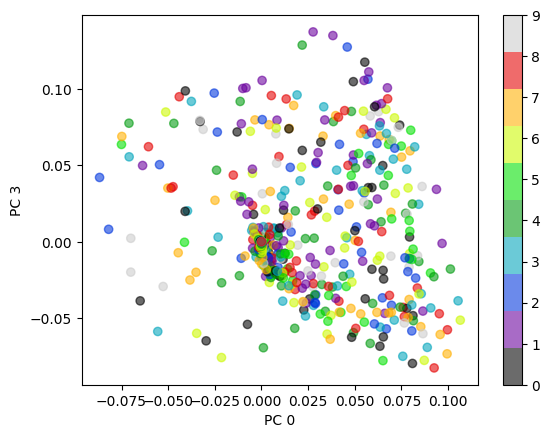

In [188]:


plt.scatter(pc_vectors[:, 0],pc_vectors[:, 3],
            c=Y_TrainSet[:784], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC 0')
plt.ylabel('PC 3')
plt.colorbar();



/tmp/ipykernel_7818/2142839960.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


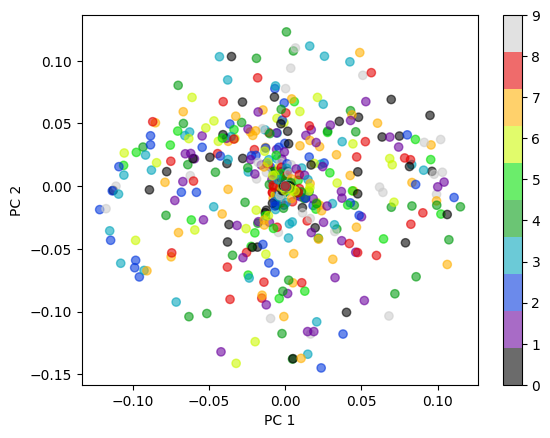

In [189]:


plt.scatter(pc_vectors[:, 1],pc_vectors[:, 2],
            c=Y_TrainSet[:784], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()



(1000, 784)
(1000, 2)


/tmp/ipykernel_7818/3109613245.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


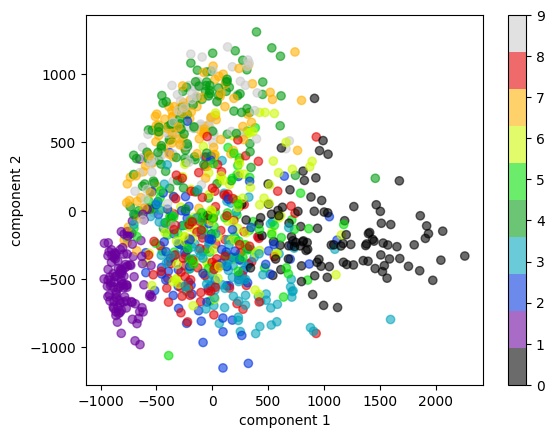

In [190]:
from sklearn.decomposition import PCA as skPCA

skPca = skPCA(2)  # project from 64 to 2 dimensions
projected = skPca.fit_transform(X_TrainSet)
print(X_TrainSet.shape)
print(projected.shape)

plt.scatter(projected[:, 0],projected[:, 1], #[0 for i in range(len(projected))]
            c=Y_TrainSet[:1000], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [191]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=20)
mean_vector, eig_vals, pc_vectors = pca(X_TrainSet)

for train_index, test_index in kf.split(pc_vectors):
    ktrainSetX, ktestSetX = X_TrainSet[train_index], X_TrainSet[test_index]
    ktrainSetY, ktestSetY = Y_TrainSet[train_index], Y_TrainSet[test_index]

    print('Train Set Shape:',ktrainSetX.shape)
    print('Train Class Shape:',ktrainSetY.shape)
    print('Test Set Shape:',ktestSetX.shape)

    clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
    clf.fit(ktrainSetX, ktrainSetY)
    y_pred = clf.predict(ktestSetX)

    print('Accuracy: ', accuracy_score(ktestSetY, y_pred))


Train Set Shape: (627, 784)
Train Class Shape: (627,)
Test Set Shape: (157, 784)
Accuracy:  0.8598726114649682
Train Set Shape: (627, 784)
Train Class Shape: (627,)
Test Set Shape: (157, 784)
Accuracy:  0.8280254777070064
Train Set Shape: (627, 784)
Train Class Shape: (627,)
Test Set Shape: (157, 784)
Accuracy:  0.8980891719745223
Train Set Shape: (627, 784)
Train Class Shape: (627,)
Test Set Shape: (157, 784)
Accuracy:  0.910828025477707
Train Set Shape: (628, 784)
Train Class Shape: (628,)
Test Set Shape: (156, 784)
Accuracy:  0.8846153846153846


# Conclusions

OUR METHOD:
<br>

Accuracy:  0.8407643312101911
<br>
Accuracy:  0.8535031847133758
<br>
Accuracy:  0.89171974522293
<br>
Accuracy:  0.910828025477707
<br>
Accuracy:  0.8397435897435898
<br>


KernelPCA:
<br>

Accuracy:  0.105
<br>
Accuracy:  0.125
<br>
Accuracy:  0.115
<br>
Accuracy:  0.11
<br>
Accuracy:  0.115
<br>


Our PCA findings and component 1-2 of KernelPCA is a lot better than KernelPCA. 
We can see that KernelPCA is not a good method for this dataset.
<br>
As shows in the figures the data collect in the KernelPCA is not seperable.
They have a lot of overlap.

# PART 3

In [192]:
from sklearn.decomposition import KernelPCA


kf = KFold(n_splits=5, shuffle=True, random_state=20)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
projected = kpca.fit_transform(X_TrainSet)

for trainIndex, test_index in kf.split(projected):

    ktrainSetX, ktestSetX = projected[trainIndex], projected[test_index]
    ktrainSetY, ktestSetY = Y_TrainSet[trainIndex], Y_TrainSet[test_index]

    print('Train Set Shape:',ktrainSetX.shape)
    print('Train Class Shape:',ktrainSetY.shape)
    print('Test Set Shape:',ktestSetX.shape)

    clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
    clf.fit(ktrainSetX, ktrainSetY)
    y_pred = clf.predict(ktestSetX)

    print('Accuracy: ', accuracy_score(ktestSetY, y_pred))


Train Set Shape: (800, 999)
Train Class Shape: (800,)
Test Set Shape: (200, 999)
Accuracy:  0.09
Train Set Shape: (800, 999)
Train Class Shape: (800,)
Test Set Shape: (200, 999)
Accuracy:  0.065
Train Set Shape: (800, 999)
Train Class Shape: (800,)
Test Set Shape: (200, 999)
Accuracy:  0.105
Train Set Shape: (800, 999)
Train Class Shape: (800,)
Test Set Shape: (200, 999)
Accuracy:  0.11
Train Set Shape: (800, 999)
Train Class Shape: (800,)
Test Set Shape: (200, 999)
Accuracy:  0.08


/tmp/ipykernel_7818/3953834927.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


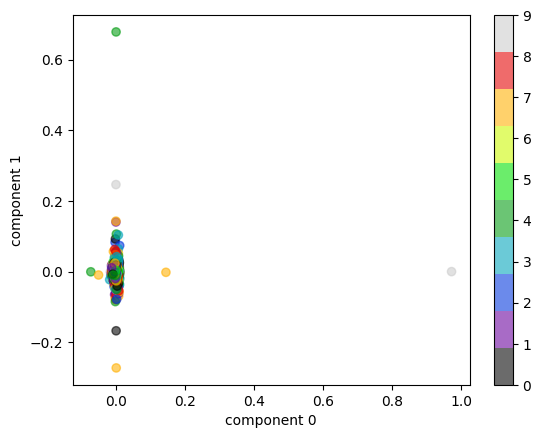

In [193]:


plt.scatter(projected[:, 0],projected[:, 1], #[0 for i in range(len(projected))]
            c=Y_TrainSet[:1000], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.colorbar()



/tmp/ipykernel_7818/3378628483.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


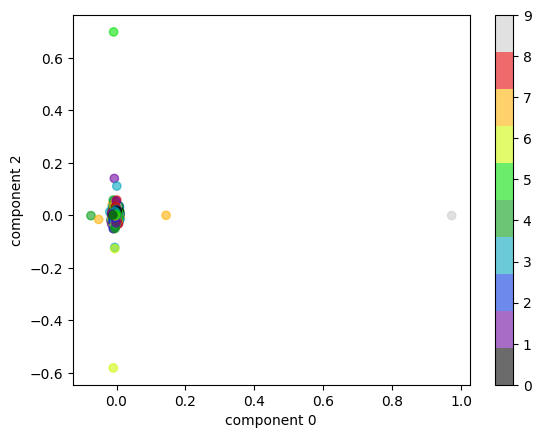

In [194]:
plt.scatter(projected[:, 0],projected[:, 2], #[0 for i in range(len(projected))]
            c=Y_TrainSet[:1000], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 0')
plt.ylabel('component 2')
plt.colorbar()


/tmp/ipykernel_7818/1245924713.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


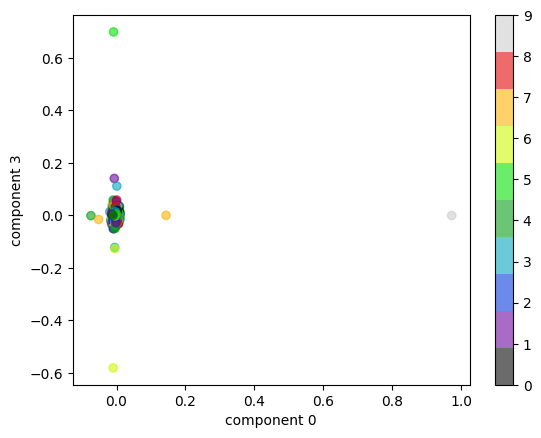

In [195]:

plt.scatter(projected[:, 0],projected[:, 2], #[0 for i in range(len(projected))]
            c=Y_TrainSet[:1000], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 0')
plt.ylabel('component 3')
plt.colorbar()


/tmp/ipykernel_7818/1553971834.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


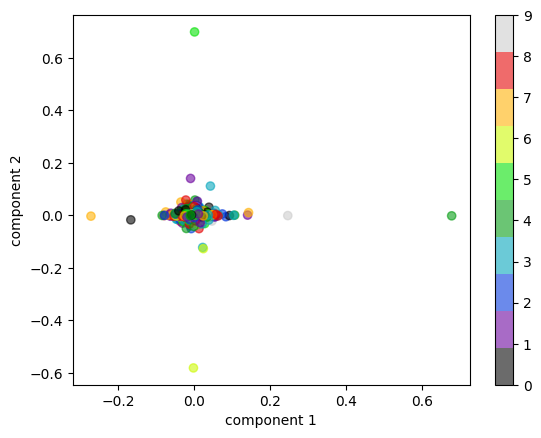

In [196]:

plt.scatter(projected[:, 1],projected[:, 2], #[0 for i in range(len(projected))]
            c=Y_TrainSet[:1000], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()


# Conclusions

OUR METHOD:
<br>

Accuracy:  0.8407643312101911
<br>
Accuracy:  0.8535031847133758
<br>
Accuracy:  0.89171974522293
<br>
Accuracy:  0.910828025477707
<br>
Accuracy:  0.8397435897435898
<br>


KernelPCA:
<br>

Accuracy:  0.105
<br>
Accuracy:  0.125
<br>
Accuracy:  0.115
<br>
Accuracy:  0.11
<br>
Accuracy:  0.115
<br>


Our PCA findings and component 1-2 of KernelPCA is a lot better than KernelPCA. 
We can see that KernelPCA is not a good method for this dataset.
<br>
As shows in the figures the data collect in the KernelPCA is not seperable.
They have a lot of overlap.